# Preamble

In [27]:
%pylab inline
# third party
import numpy as np 

import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import trange
torch.set_printoptions(sci_mode=False)


# project 
from code.utils import fetch_mnist

Populating the interactive namespace from numpy and matplotlib


In [10]:
# Get the MNIST data
X_train, Y_train, X_test, Y_test = fetch_mnist()

# PyTorch implementation of a simple NN

loss 0.31 accuracy 0.93: 100%|██████████| 1000/1000 [00:01<00:00, 619.73it/s]


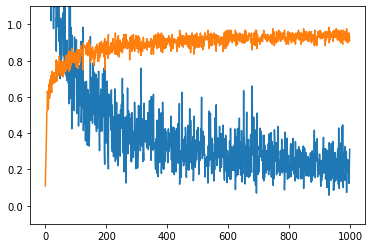

In [62]:
class ArtNet(torch.nn.Module):
    def __init__(self):
        super(ArtNet, self).__init__()
        self.l1 = nn.Linear(784, 128, bias=False)
        self.l2 = nn.Linear(128, 10, bias=False)
        self.sm = nn.LogSoftmax(dim=1)
        
    def forward(self, x):
        x = F.relu(self.l1(x))
        x = self.l2(x)
        x = self.sm(x)
        return x
    
model = ArtNet()
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0)
batch_size = 128
losses, accuracies = [], []

iterator = trange(1000)
for i in iterator:
    sample = np.random.randint(0, X_train.shape[0], size=batch_size)
    X = torch.tensor(X_train[sample].reshape((-1, 28*28))).float()
    Y = torch.tensor(Y_train[sample]).long()
    optim.zero_grad()
    
    out = model(X)
    cat = out.argmax(dim=1)
    
    accuracy = (cat == Y).float().mean()
      
    loss = loss_fn(out, Y).mean()
    loss.backward()
    
    optim.step()
    
    losses.append(loss.item())
    accuracies.append(accuracy.item())
    iterator.set_description(f"loss {loss:.2f} accuracy {accuracy:.2f}")

plt.ylim(-0.1, 1.1)
plot(losses)
plot(accuracies)

# NumPy implementation

Notes:
- [Vector & Matrix calculus and other maths](http://cs231n.stanford.edu/slides/2018/cs231n_2018_ds02.pdf)
